<a href="https://colab.research.google.com/github/RamadeviKN/Student-Performance-Analysis-Using-Machine-Learning/blob/main/Regression/student_performance_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Student_Performance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_hours_studied = dataset['Hours Studied']

In [4]:
print(X)
print(y)
print(X_hours_studied)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]
[91. 65. 45. ... 74. 95. 64.]
0       7
1       4
2       8
3       5
4       7
       ..
9995    1
9996    7
9997    6
9998    9
9999    7
Name: Hours Studied, Length: 10000, dtype: int64


## Encoding categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_encoded = np.array(ct.fit_transform(X))

In [6]:
print(X_encoded)

[[0.0 1.0 7 99 9 1]
 [1.0 0.0 4 82 4 2]
 [0.0 1.0 8 51 7 2]
 ...
 [0.0 1.0 6 83 8 5]
 [0.0 1.0 9 97 7 0]
 [1.0 0.0 7 74 8 1]]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [9]:
y_train_pred = regressor.predict(X_train)  # Predictions on training data
y_test_pred = regressor.predict(X_test)  # Predictions on testing data

## Predicting the Test set results

In [12]:
#y_pred = regressor.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(X_train)
print(y_train)
print(y_train_pred)

[[1.0 0.0 5 95 6 4]
 [1.0 0.0 2 98 7 4]
 [0.0 1.0 2 65 8 1]
 ...
 [0.0 1.0 1 76 6 5]
 [1.0 0.0 4 44 4 8]
 [0.0 1.0 8 83 8 1]]
[83. 71. 43. ... 54. 27. 76.]
[80.58874267 75.56642938 42.52266362 ... 50.67568813 25.5720337
 77.97375017]


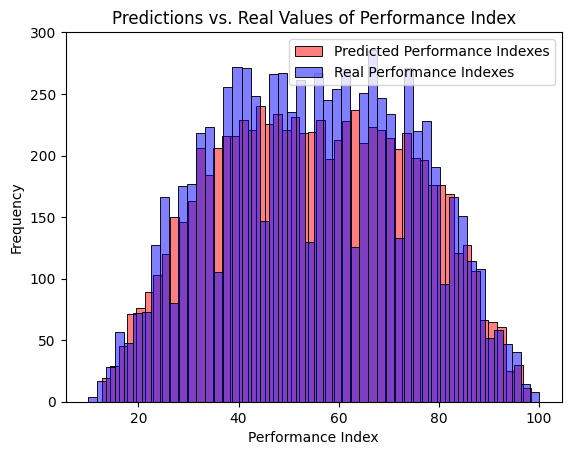

In [17]:
# Plot the predictions and the real values
import seaborn as sns
sns.histplot(y_train_pred, label='Predicted Performance Indexes', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='Real Performance Indexes', color='blue', alpha=0.5, bins=50)
import matplotlib.pyplot as plt
plt.title('Predictions vs. Real Values of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Residual Plot

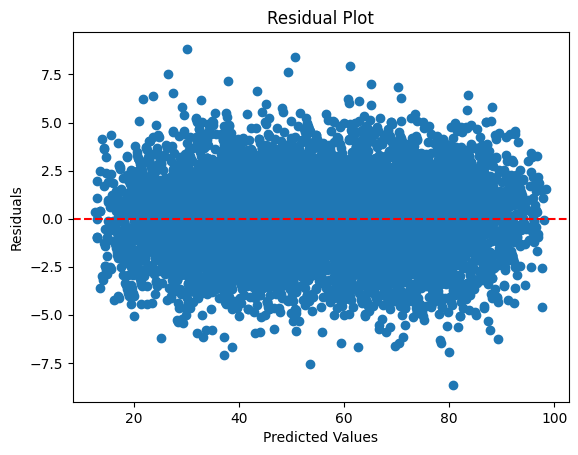

In [18]:
# Calculate residuals
residuals = y_train - y_train_pred

# Plot the residuals
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Heatmap of Correlations

In [1]:
# Plot heatmap
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

NameError: name 'sns' is not defined

## Evaluate the model

In [81]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9889033042773491